In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import sympy
sympy.init_printing(use_unicode=True)

## Doublet

Let's consider a doublet system which is form as
$$Q_f-O-Q_d$$

and assume ${f_F}$ and $-{f_D}$ as the focal length of the two quad and a drift of length $L$ between them. Both $f_F$ and $f_D$ are positive numbers

Then the total transfer matrix gives:
\begin{equation}
M_{dbl}=
\left(\begin{array}{cc}
1 & 0\\
\frac{1}{f_D} & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & L\\
0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & 0\\
-\frac{1}{f_F} & 1
\end{array}\right)
\end{equation}

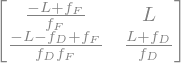

In [3]:
l,fd,ff, f=sympy.symbols("L,f_D,f_F,f")
def mat_q(f):
    return sympy.Matrix([[1,0],[1/f,1]])
def mat_d(d):
    return sympy.Matrix([[1,d],[0,1]])
mat_dbl=sympy.simplify(mat_q(fd)*mat_d(l)*mat_q(-ff))
mat_dbl

If we let the two focal length equal, then we got focusing effect that do not depend on horizontal and or vertical direction.  And the trace of the matrix is 2!

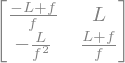

In [4]:
mat_dbl.subs(fd,f).subs(ff,f)

## FODO cells

FODO cell is a type of widely used cell of magnets.  It consist of only two quadrupoles and two dipoles or simply drifts between quads.  To make a symmetric cell, we use the following sequence:
$$\frac{1}{2}\text{QF}-\text{O}-\text{QD}-\text{O}-\frac{1}{2}\text{QF}$$


### Betatron transfer matrix

We use the following approximation:
* Small bending angle approximation: the transfer matrix for a dipole reduces to a drift space, the space between quads are same, which is $L_1$
* Short quadrupole approximation, so that the quad can be modeled by its focusing length $f$
* Focusing length and defocusing length are same.

Then the matrix is
\begin{equation}
M_{FODO}=
\left(\begin{array}{cc}
1 & 0\\
-\frac{1}{2f} & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & L_1\\
0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & 0\\
\frac{1}{f} & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & L_1\\
0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & 0\\
-\frac{1}{2f} & 1
\end{array}\right)
\end{equation}

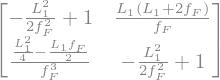

In [4]:
l,f,ff,fd,a=sympy.symbols(r"L_1,f,f_F,f_D,\alpha")
def mat_q(f):
    return sympy.Matrix([[1,0],[1/f,1]])
def mat_d(d):
    return sympy.Matrix([[1,d],[0,1]])
mat_fodo=sympy.simplify(mat_q(-2*ff)*mat_d(l)*mat_q(fd)*mat_d(l)*mat_q(-2*ff))
mat_fodo.subs(fd, ff)

The transfer matrix to/from the mid-point of the focusing quad is 
\begin{equation}
M_{FODO}=
\left(\begin{matrix}- \frac{L_{1}^{2}}{2 f^{2}} + 1 & \frac{L_{1}}{f} \left(L_{1} + 2 f\right)\\\frac{L_{1}}{4 f^{3}} \left(L_{1} - 2 f\right) & - \frac{L_{1}^{2}}{2 f^{2}} + 1\end{matrix}\right)
\end{equation}

The determinant of the matrix is always 1.  The trace of the FODO cell is 
$2- \frac{L_{1}^{2}}{ f^{2}} $.  





The starting point can be choose arbitrarily.  If we use the midpoint of the defocusing quad:

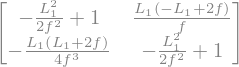

In [5]:
mat_fodo_2=sympy.simplify(mat_q(2*f)*mat_d(l)*mat_q(-f)*mat_d(l)*mat_q(2*f))
mat_fodo_2


The transfer matrix becomes:
\begin{equation}
M_{FODO,midQD}=
\left(\begin{matrix}- \frac{L_{1}^{2}}{2 f^{2}} + 1 & \frac{L_{1}}{f} \left(- L_{1} + 2 f\right)\\- \frac{L_{1}}{4 f^{3}} \left(L_{1} + 2 f\right) & - \frac{L_{1}^{2}}{2 f^{2}} + 1\end{matrix}\right)
\end{equation}

The trace remain unchanged.

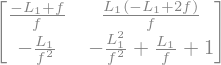

In [6]:
mat_fodo_3=sympy.simplify(mat_d(0)*mat_q(f)*mat_d(l)*mat_q(-f)*mat_d(l))
mat_fodo_3

If we set the starting point right after the focusing quadrupole, the matrix becomes
\begin{equation}
M_{FODO,afterQF}=
\left(\begin{matrix}\frac{1}{f} \left(- L_{1} + f\right) & \frac{L_{1}}{f} \left(- L_{1} + 2 f\right)\\- \frac{L_{1}}{f^{2}} & - \frac{L_{1}^{2}}{f^{2}} + \frac{L_{1}}{f} + 1\end{matrix}\right)
\end{equation}

Again the trace remain unchanged.  That is a natural result since trace of the product of matrices is an invariant under cyclic permutation.

### Use FODO cell in repeating structure

To use the FODO cell many time in a repeating structure, the trace has to be larger than $-2$.  Therefore:
$$- \frac{L_{1}^{2}}{2 f^{2}} + 1 > -1 $$
which reduces to:
$$L_1<2f$$

Then we can get the optics parameters of the one-turn matrix:
$$
M=\left(\begin{array}{cc}
\cos\Phi+\alpha\sin\Phi & \beta\sin\Phi\\
-\gamma\sin\Phi & \cos\Phi-\alpha\sin\Phi
\end{array}\right)
$$

Then the betatron phase advance can be calculated from:
\begin{equation}
\cos{\Phi}=\frac{1}{2}\operatorname{tr}(M)=1-\frac{L_1^2}{2f^2}
\end{equation}

or 
\begin{equation}
\sin{\frac{\Phi}{2}}=\frac{L_1}{2f}
\end{equation}

The trace is an invariant under changing the starting piont, so does the phase advance.

The optical function can be calculated at different locations by:
\begin{align}
\beta  &= \frac{M_{12}}{\sin\Phi}\\
\alpha &= \frac{M_{11}-M_{22}}{2\sin\Phi}
\end{align}

At the middle point of the QD or QF we have:
\begin{align}
\beta_{F/D}  &= \frac{2L_1\left(1\pm\sin(\Phi/2)\right)}{\sin\Phi}\\
\alpha &= 0
\end{align}

Right after the focusing quad, we have:
\begin{align}
\beta  &= \frac{2L_1\left(1-\sin(\Phi/2)\right)}{\sin\Phi}\\
\alpha &= \frac{L_1}{f}\frac{\sin(\Phi/2)-1}{\sin\Phi}
\end{align}

### Dispersion in FODO cells

Let's consider the FODO cells with small bending angle approximation, starting from the mid point of the focusing quad.  The extended $3\times 3$ matrix $\mathcal{M}$ gives

\begin{equation}
\mathcal{M}_{FODO}=
\left(\begin{array}{cc}
1 & 0 & 0\\
-\frac{1}{2f} & 1 & 0\\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & L_1 & L_1 \theta/2\\
0 & 1 & \theta \\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & 0 & 0\\
\frac{1}{f} & 1 & 0\\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & L_1 & L_1 \theta/2\\
0 & 1 & \theta \\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & 0 & 0\\
-\frac{1}{2f} & 1 & 0\\
0 & 0 & 1
\end{array}\right)
\end{equation}

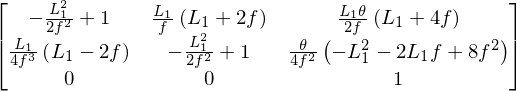

In [7]:
t=sympy.symbols("\\theta")
def matd_q(f):
    return sympy.Matrix([[1,0,0],[1/f,1,0],[0,0,1]])
def matd_d(d, ang):
    return sympy.Matrix([[1,d,d*ang/2],[0,1,ang],[0,0,1]])
mat_fodo=sympy.simplify(matd_q(-2*f)*matd_d(l,t)*matd_q(f)*matd_d(l,t)*matd_q(-2*f))
mat_fodo

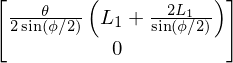

In [8]:
s=sympy.symbols('\sin(\phi/2)')
sympy.simplify(sympy.Inverse(sympy.eye(2)-mat_fodo[:2,:2])*mat_fodo[:2,2]).subs(f, l/2/s)

The matrix $\mathcal{M}$ of FODO cell gives
\begin{equation}
\mathcal{M}_{FODO}=
\left(\begin{matrix}- \frac{L_{1}^{2}}{2 f^{2}} + 1 & \frac{L_{1}}{f} \left(L_{1} + 2 f\right) & \frac{L_{1} \theta}{2 f} \left(L_{1} + 4 f\right)\\\frac{L_{1}}{4 f^{3}} \left(L_{1} - 2 f\right) & - \frac{L_{1}^{2}}{2 f^{2}} + 1 & \frac{\theta}{4 f^{2}} \left(- L_{1}^{2} - 2 L_{1} f + 8 f^{2}\right)\\0 & 0 & 1\end{matrix}\right)
\end{equation}

The dispersion function in periodical boundary condition gives:
\begin{equation}
\left(\begin{array}{c}
D\\
D'
\end{array}\right) _{midQF}= 
\left(\begin{matrix}\frac{L_1\theta}{2 \sin(\Phi/2)} \left(1 + \frac{2}{\sin(\Phi/2)}\right)\\0\end{matrix}\right)
\end{equation}

One can easily get the dispersion function at the middle point of the defocusing quad as: 
\begin{equation}
\left(\begin{array}{c}
D\\
D'
\end{array}\right)_{midQD} = 
\left(\begin{matrix}\frac{L_1\theta}{2 \sin(\Phi/2)} \left(-1 + \frac{2}{\sin(\Phi/2)}\right)\\0\end{matrix}\right)
\end{equation}

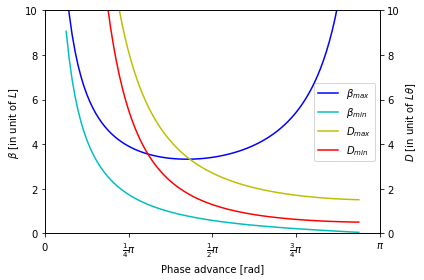

In [9]:
epsilon=0.2
phi=np.linspace(epsilon,np.pi-epsilon,100)
beta_max=2*(1+np.sin(phi/2))/np.sin(phi)
eta_max=(np.sin(phi/2)+2)/2/np.sin(phi/2)/np.sin(phi/2)
beta_min=2*(1-np.sin(phi/2))/np.sin(phi)
eta_min=(-np.sin(phi/2)+2)/2/np.sin(phi/2)/np.sin(phi/2)
fig,ax=plt.subplots()
ax_m=ax.twinx()
ax.set_xlabel("Phase advance [rad]")
ax.set_ylabel(r"$\beta$ [in unit of $L$]")
ax_m.set_ylabel(r"$D$ [in unit of $L\theta$]")
ax.set_ylim(0,10)
ax.set_xlim(0,np.pi)
ax_m.set_ylim(-0,10)
l1=ax.plot(phi,beta_max,c='b',label=r'$\beta_{max}$')
l2=ax.plot(phi,beta_min,c='c',label=r'$\beta_{min}$')
l3=ax_m.plot(phi,eta_max, c='y', label=r'$D_{max}$')
l4=ax_m.plot(phi,eta_min, c='r', label=r'$D_{min}$')
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='right')
ax.set_xticks(np.linspace(0,1,5,)*np.pi)
ax.set_xticklabels(["$0$", r"$\frac{1}{4}\pi$", r"$\frac{1}{2}\pi$",
                    r"$\frac{3}{4}\pi$", r"$\pi$",
                     ])

fig.tight_layout()

In [2]:
import PyLatte.latticeIO.elegantIO as elegantIO

In [3]:
fodo_lattice=elegantIO.elegantLatticeFile()
with open('fodo.lte','r') as f:                                                   
    fodo_lattice.parseFrom(f)

fodo_lattice.modifyElement('bend', l=1.8)
fodo_lattice.modifyAllElements('kquad', name_contain='qf', k1=0.5)
fodo_lattice.modifyAllElements('kquad', name_contain='qd', k1=-0.5)
fodo_lattice.setUseLine()
twiss_list, twiss_parameter=elegantIO.elegant_findtwiss(fodo_lattice,matched=1, closed_orbit=True, divide_element=5)
end_twiss=twiss_list.iloc[-1].to_numpy()[[1,2,4,5,6,7,9,10]]
end_phi=twiss_list.iloc[-1].to_numpy()[3]
end_twiss, end_phi

(array([ 1.04304446e+01, -3.08492980e-09,  8.21286717e-01, -4.42798196e-09,
         1.91502309e+00,  4.95666390e-10,  0.00000000e+00,  0.00000000e+00]),
 1.6102899583090955)

<IPython.core.display.Javascript object>


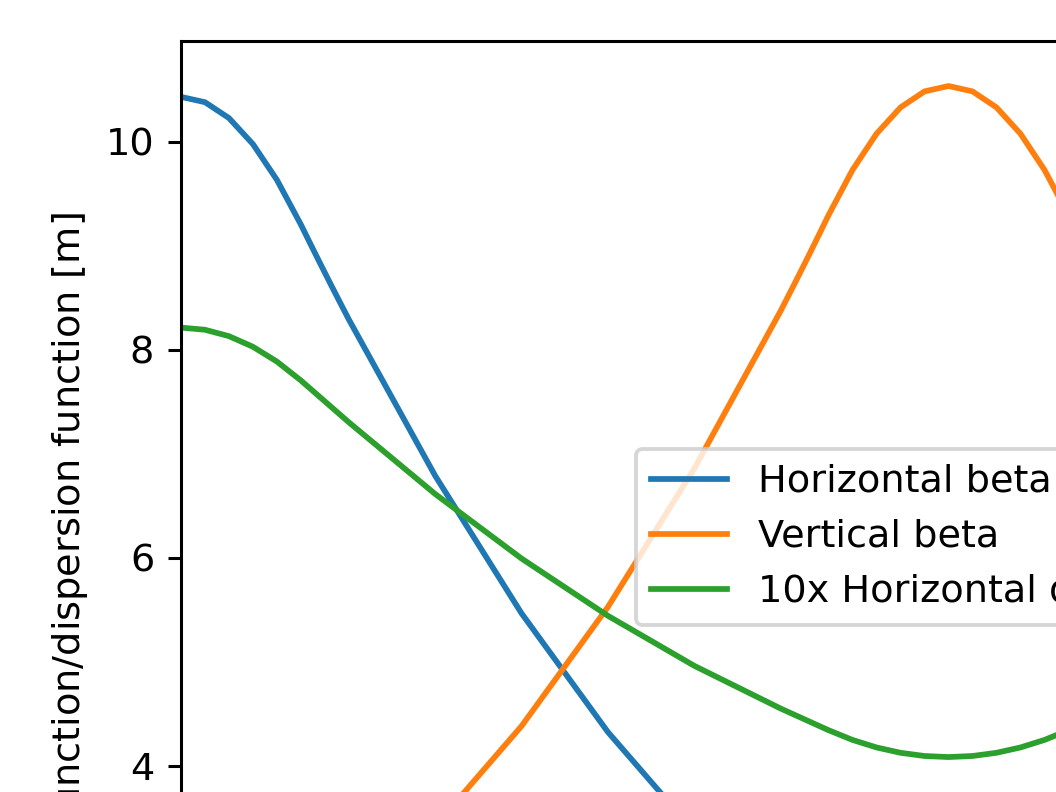

In [9]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
fodo_lattice.plotBeamline(ax2)

ax1.plot(twiss_list['s'],twiss_list['betax'], label='Horizontal beta')
ax1.plot(twiss_list['s'], twiss_list['betay'], label='Vertical beta')
ax1.plot(twiss_list['s'], twiss_list['etax']*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

In [10]:
fodo_copies=6
lines=[]
dispersion_suppress=elegantIO.elegantLatticeFile()
for i in range(fodo_copies):
    line_name=dispersion_suppress.loadALine(fodo_lattice, 'fodo', suffix='_{}'.format(i+1))
    lines.append(line_name)
dispersion_suppress.appendToBeamline('total_line', *lines)

angle=fodo_lattice.getElementProperties('bend','angle')

for i in range(fodo_copies-2, fodo_copies):
    dispersion_suppress.modifyElement('bend_{}'.format(i+1), angle=angle/2.0)
dispersion_suppress.setUseLine('total_line')
twiss_list, twiss_parameter=elegantIO.elegant_findtwiss(dispersion_suppress, matched=0, initial_optics=end_twiss, divide_element=5)

<IPython.core.display.Javascript object>


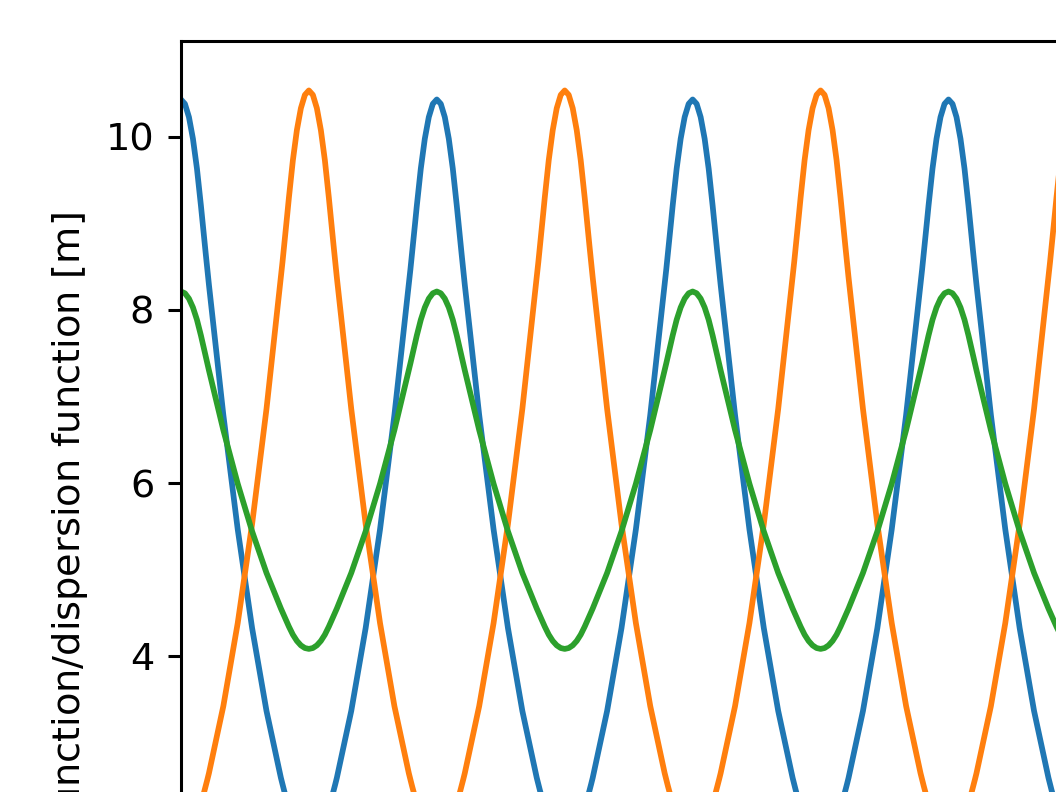

In [6]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
dispersion_suppress.plotBeamline(ax2)

ax1.plot(twiss_list['s'],twiss_list['betax'], label='Horizontal beta')
ax1.plot(twiss_list['s'], twiss_list['betay'], label='Vertical beta')
ax1.plot(twiss_list['s'], twiss_list['etax']*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

In [45]:
print(twiss_list[[1,2],-1]-end_twiss[[0,1]]) # beta, alpha
print(twiss_list[[4,5],-1])  # dispersion,dispersion'

[ 0.000208   -0.00054061]
[0.02082463 0.0013942 ]


0.48100817822503233


<IPython.core.display.Javascript object>


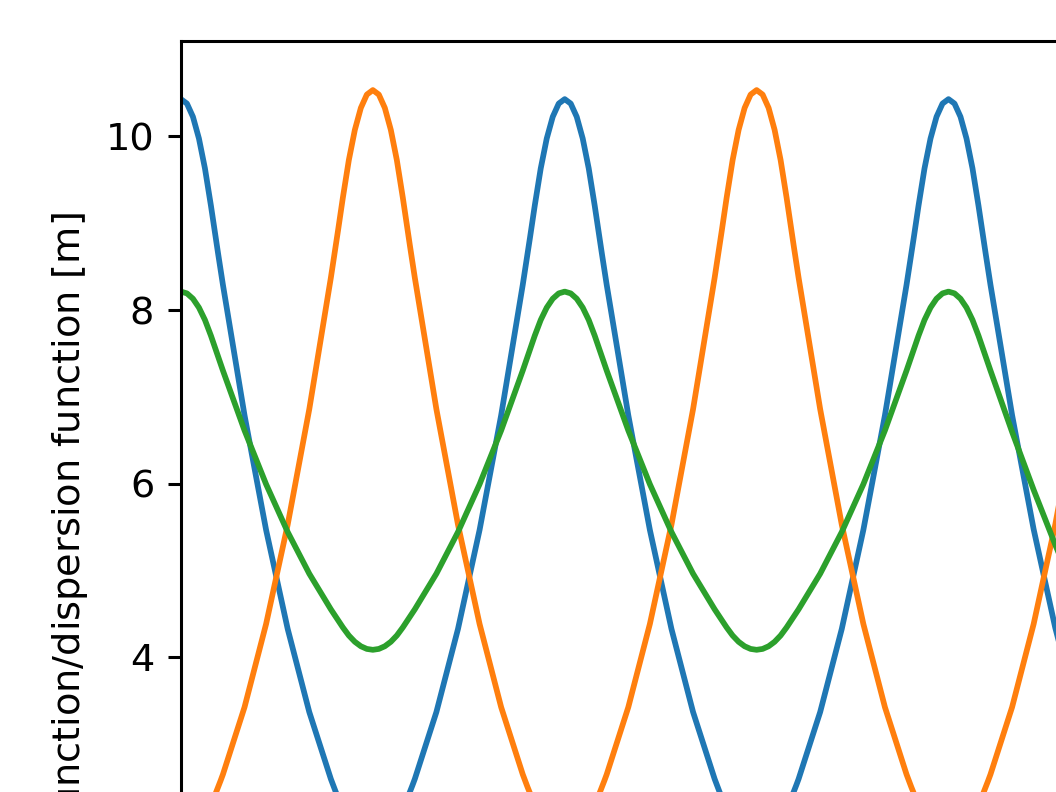

In [7]:
fodo_copies=4
angle=fodo_lattice.getElementProperties('bend','angle')
phi=end_phi
param=1.0/2.0/(1-np.cos(phi))
angle1=angle*param
angle2=angle-angle1
print(param)

lines=[]
dispersion_suppress2=elegantIO.elegantLatticeFile()
for i in range(fodo_copies):
    line_name=dispersion_suppress2.loadALine(fodo_lattice, 'fodo', suffix='_{}'.format(i+1))
    lines.append(line_name)
dispersion_suppress2.appendToBeamline('total_line', *lines)



i=fodo_copies-1
dispersion_suppress2.modifyElement('bend_{}'.format(i+1), angle=angle1)
i=fodo_copies-2
dispersion_suppress2.modifyElement('bend_{}'.format(i+1), angle=angle2)
dispersion_suppress2.setUseLine('total_line')

twiss_list, twiss_parameter=elegantIO.elegant_findtwiss(dispersion_suppress2, matched=0, initial_optics=end_twiss, divide_element=5)
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
dispersion_suppress2.plotBeamline(ax2)

ax1.plot(twiss_list['s'],twiss_list['betax'], label='Horizontal beta')
ax1.plot(twiss_list['s'], twiss_list['betay'], label='Vertical beta')
ax1.plot(twiss_list['s'], twiss_list['etax']*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

### $\mathcal{H}$ function in FODO cell

<IPython.core.display.Javascript object>


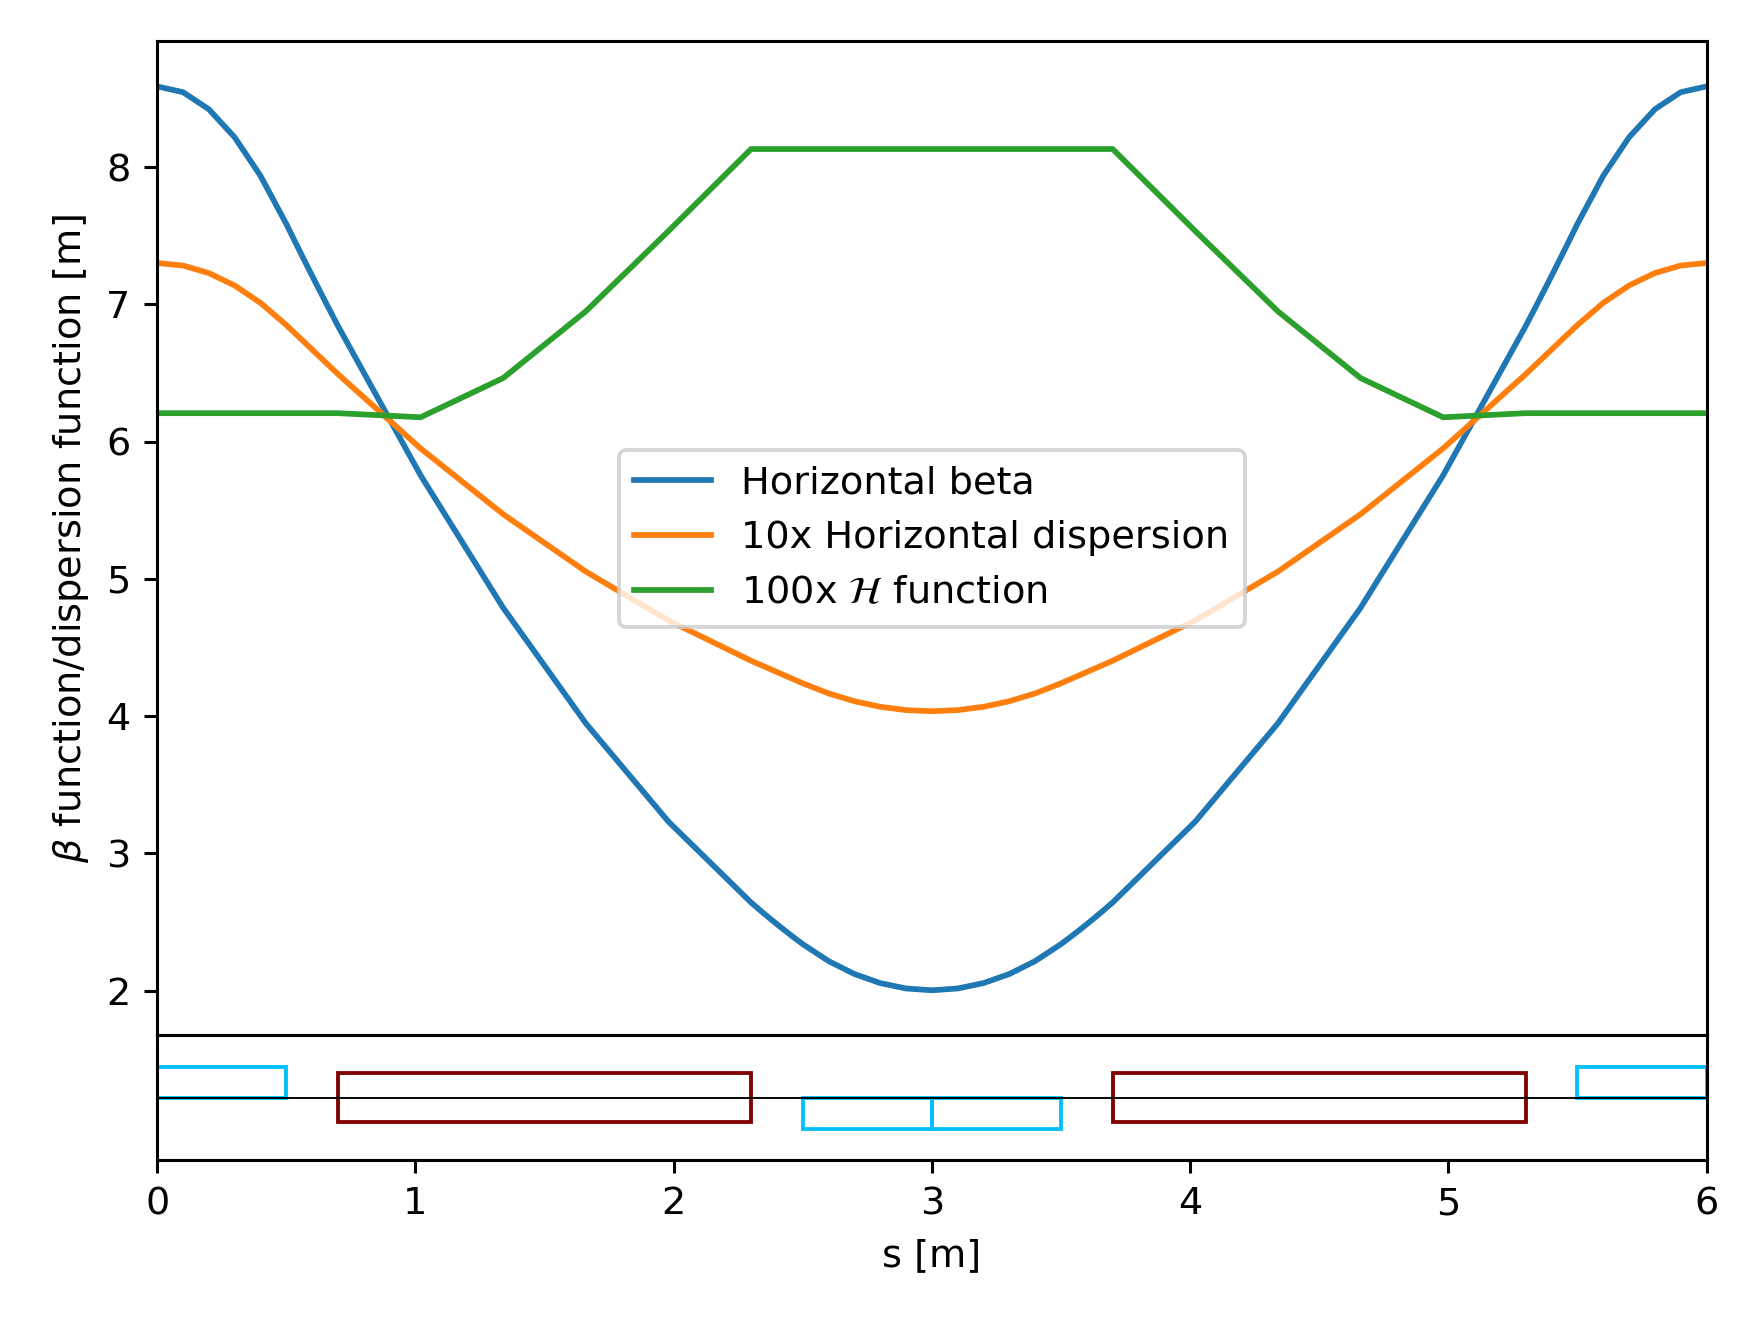

array([ 1.04304446e+01,  2.57779909e-15,  8.21286688e-01, -5.75928194e-16,
        1.91502309e+00,  1.16573418e-15,  0.00000000e+00,  0.00000000e+00])

In [13]:
fodo_lattice=elegantIO.elegantLatticeFile()
with open('fodo.lte','r') as f:                                                   
    fodo_lattice.parseFrom(f)

fodo_lattice.modifyElement('bend', l=1.6)
fodo_lattice.modifyAllElements('kquad', name_contain='qf', k1=0.5)
fodo_lattice.modifyAllElements('kquad', name_contain='qd', k1=-0.4)
fodo_lattice.setUseLine()
twiss_list, twiss_parameter=elegantIO.elegant_findtwiss(fodo_lattice,matched=1,divide_element=5)
#end_twiss=twiss_list[[1,2,3,4,5],-1]

fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
fodo_lattice.plotBeamline(ax2)
Hx=twiss_list['betax']*twiss_list['etaxp']*twiss_list['etaxp']+2*twiss_list['alphax']*twiss_list['etax']*twiss_list['etaxp']+(
    1+twiss_list['alphax']*twiss_list['alphax'])*twiss_list['etax']*twiss_list['etax']/twiss_list['betax']

ax1.plot(twiss_list['s'], twiss_list['betax'], label='Horizontal beta')
ax1.plot(twiss_list['s'], twiss_list['etax']*10, label='10x Horizontal dispersion')
ax1.plot(twiss_list['s'], Hx*100, label=r'100x $\mathcal{H}$ function')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)
end_twiss

We have optics at the middle of QF and QD
\begin{align}
\beta_{F/D}  &= \frac{2L_1\left(1\pm\sin(\Phi/2)\right)}{\sin\Phi}\\
D_{F/D} &= \frac{L_1\theta}{2 \sin(\Phi/2)} \left( \pm 1 + \frac{2}{\sin(\Phi/2)}\right)
\end{align}

Therefore the $\mathcal{H}$ at these two location gives:

\begin{align}
\mathcal{H}_{F/D} &= \frac{L\theta^2 \cos(\Phi/2)}{\sin^3(\Phi/2)\left(1\pm\sin(\Phi/2) \right)}
\left(1\pm\frac{1}{2}\sin\frac{\Phi}{2}\right)^2
\end{align}

Let's replace the integral with the average of the value at both end of the dipole.
\begin{align}
\rho\frac{I_5}{I_2} &= \rho\frac{\oint\frac{\mathcal{H}}{\rho^3}ds}{\oint\frac{1}{\rho^2}ds} \\
&=\frac{1}{2}\left({\mathcal{H}_{F}+\mathcal{H}_{D}}\right) \\
&=\frac{\rho\theta^3 \cos(\Phi/2)}{2\sin^3(\Phi/2)}
\left(\frac{\left(1+\frac{1}{2}\sin\frac{\Phi}{2}\right)^2}{\left(1+\sin(\Phi/2) \right)}+
\frac{\left(1-\frac{1}{2}\sin\frac{\Phi}{2}\right)^2}{\left(1-\sin(\Phi/2) \right)}\right) \\
&=\rho\theta^3\frac{ \cos(\Phi/2)}{\sin^3(\Phi/2)\cos(\Phi/2)}\left(1-\frac{3}{4}\sin^2\frac{\Phi}{2}\right)
\end{align}

Also Let's look at the natural chromaticity of this lattice:
\begin{align}
C_x&=-\frac{1}{4\pi}\int\beta_x K_x ds \\
&=-\frac{1}{4\pi f}\left(\beta_{max} - \beta_{min}\right) \\
&=-\frac{\tan(\Phi/2)}{\pi} \\
&=-\frac{\tan(\Phi/2)}{\Phi/2} \nu_x
\end{align}


138.39385343374136 1.18777034003462
1.625088947035233


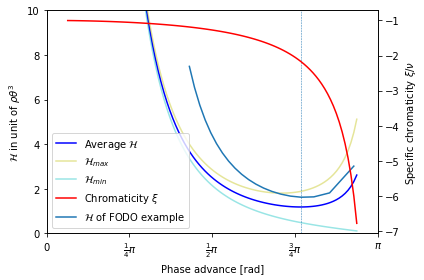

In [19]:
epsilon=0.2
phi=np.linspace(epsilon,np.pi-epsilon,100)
beta_max=2*(1+np.sin(phi/2))/np.sin(phi)
eta_max=(np.sin(phi/2)+2)/2/np.sin(phi/2)/np.sin(phi/2)
beta_min=2*(1-np.sin(phi/2))/np.sin(phi)
eta_min=(np.sin(phi/2)-2)/2/np.sin(phi/2)/np.sin(phi/2)

H_min=eta_max*eta_max/beta_max
H_max=eta_min*eta_min/beta_min


    
loc=np.argmin(H_max+H_min)
print(phi[loc]/np.pi*180, (H_max+H_min)[loc]/2)
chrom=-np.tan(phi/2.0)/(phi/2.0)

fig,ax=plt.subplots()
ax_m=ax.twinx()
ax.set_xlabel("Phase advance [rad]")
ax.set_ylabel(r"$\mathcal{H}$ in unit of $\rho \theta^3$")
ax_m.set_ylabel(r"Specific chromaticity $\xi/\nu$")
ax.set_ylim(0,10)
ax.set_xlim(0,np.pi)
#ax_m.set_ylim(-10,10)
l1=ax.plot(phi,(H_max+H_min)/2.0, c='b', label=r'Average $\mathcal{H}$')
l2=ax.plot(phi,H_max,c='y',label=r'$\mathcal{H}_{max}$', alpha=0.4)
l3=ax.plot(phi,H_min,c='c',label=r'$\mathcal{H}_{min}$', alpha=0.4)
l4=ax_m.plot(phi,chrom, c='r', label=r'Chromaticity $\xi$')
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=3)
ax.set_xticks(np.linspace(0,1,5,)*np.pi)
ax.set_xticklabels(["$0$", r"$\frac{1}{4}\pi$", r"$\frac{1}{2}\pi$",
                    r"$\frac{3}{4}\pi$", r"$\pi$",
                     ])
ax.axvline(x=phi[loc], ls='--', lw=.5)
fodo_lattice=elegant.elegantLatticeFile()
with open('fodo.lte','r') as f:                                                   
    fodo_lattice.parseFrom(f)
fodo_lattice.modifyAllElements('kquad', name_contain='qf', k1=0.5)
fodo_lattice.modifyAllElements('kquad', name_contain='qd', k1=-0.4)

I5I2list=[]
phi_list=[]

l_list=np.linspace(1.2, 2.9, 20)
for dipole_length in l_list:
    fodo_lattice.modifyElement('bend', l=dipole_length)
    fodo_lattice.setUseLine()
    twiss_list, twiss_parameter=elegant.elegant_findtwiss(fodo_lattice,matched=1)
    I5I2list.append(twiss_parameter['I5']/twiss_parameter['I2'])
    phi_list.append(twiss_parameter['nux']*2*np.pi)
angle=fodo_lattice.getElementProperties('bend','angle')   
l5=ax.plot(phi_list, np.array(I5I2list)/angle/angle/angle, label=r'$\mathcal{H}$ of FODO example')
lns=lns+l5
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=3)
fig.tight_layout()
print(np.min(np.array(I5I2list)/angle/angle/angle))

In [2]:
import PyLatte.latticeIO.elegantIO as elegantIO

<IPython.core.display.Javascript object>


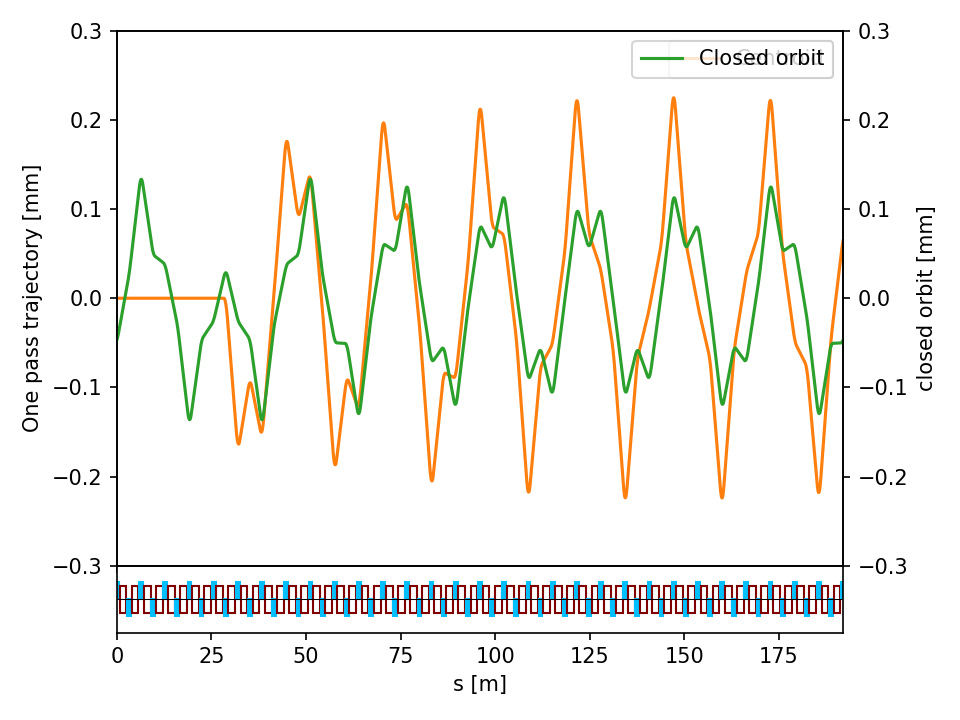

In [3]:
fodo_lattice=elegantIO.elegantLatticeFile()
with open('fodo.lte','r') as f:                                                   
    fodo_lattice.parseFrom(f)

fodo_copies=30
fodo_lattice.modifyElement('bend', l=1.8, angle=np.pi/fodo_copies)
fodo_lattice.modifyAllElements('kquad', name_contain='qf', k1=0.5)
fodo_lattice.modifyAllElements('kquad', name_contain='qd', k1=-0.5)

lines=[]
fodo_ring=elegantIO.elegantLatticeFile()
for i in range(fodo_copies):
    line_name=fodo_ring.loadALine(fodo_lattice, 'fodo', suffix='_{}'.format(i+1))
    lines.append(line_name)
fodo_ring.modifyElement('QDH_5', DX = 1e-4)
fodo_ring.modifyElement('QFH_9', DX = 0e-4)
fodo_ring.appendToBeamline('total_line', *lines)
fodo_ring.useline="total_line"

twiss_list, twiss_parameter=elegantIO.elegant_findtwiss(fodo_ring, matched=1, closed_orbit=True, divide_element=5)
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
ax1m=ax1.twinx()

fodo_ring.plotBeamline(ax2)
centroid, _ = elegantIO.read_elegant_SDDS_content("temp.cen", ["Cx"])
#ax1.plot(twiss_list['s'],twiss_list['betax'], label='Horizontal beta')
#ax1.plot(twiss_list['s'], twiss_list['betay'], label='Vertical beta')
ax1.plot(twiss_list['s'], centroid['Cx']*1e3, label='Centroid', color='C1')
ax1m.plot(twiss_list['s'], twiss_list['x']*1e3, label='Closed orbit', color='C2')
ax1.set_ylim(-0.3,0.3)
ax1m.set_ylim(-0.3,0.3)
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'One pass trajectory [mm]')
ax1m.set_ylabel(r'closed orbit [mm]')
fig.tight_layout()
ax1.legend(loc='best')
ax1m.legend(loc='best')
plt.subplots_adjust(hspace=0.0)



In [5]:
elegantIO.elegantLatticeFile.elegantParameterNames['CSBEND']

{'L': 0.0,
 'ANGLE': 0.0,
 'K1': 0.0,
 'K2': 0.0,
 'K3': 0.0,
 'K4': 0.0,
 'K5': 0.0,
 'K6': 0.0,
 'K7': 0.0,
 'K8': 0.0,
 'E1': 0.0,
 'E2': 0.0,
 'TILT': 0.0,
 'H1': 0.0,
 'H2': 0.0,
 'HGAP': 0.0,
 'FINT': 0.5,
 'FINT1': -1.0,
 'FINT2': -1.0,
 'DX': 0.0,
 'DY': 0.0,
 'DZ': 0.0,
 'XKICK': 0.0,
 'YKICK': 0.0,
 'FSE': 0.0,
 'FSE_DIPOLE': 0.0,
 'FSE_QUADRUPOLE': 0.0,
 'ETILT': 0.0,
 'EPITCH': 0.0,
 'EYAW': 0.0,
 'N_SLICES': 4,
 'N_KICKS': 4,
 'ETILT_SIGN': 1,
 'NONLINEAR': 1,
 'SYNCH_RAD': 0,
 'EDGE1_EFFECTS': 1,
 'EDGE2_EFFECTS': 1,
 'EDGE_ORDER': 1,
 'INTEGRATION_ORDER': 4,
 'EXPAND_HAMILTONIAN': 0,
 'EDGE1_KICK_LIMIT': -1.0,
 'EDGE2_KICK_LIMIT': -1.0,
 'KICK_LIMIT_SCALING': 0,
 'USE_BN': 0,
 'EXPANSION_ORDER': 0,
 'B1': 0.0,
 'B2': 0.0,
 'B3': 0.0,
 'B4': 0.0,
 'B5': 0.0,
 'B6': 0.0,
 'B7': 0.0,
 'B8': 0.0,
 'XREFERENCE': 0.0,
 'F1': 0.0,
 'F2': 0.0,
 'F3': 0.0,
 'F4': 0.0,
 'F5': 0.0,
 'F6': 0.0,
 'F7': 0.0,
 'F8': 0.0,
 'G1': 0.0,
 'G2': 0.0,
 'G3': 0.0,
 'G4': 0.0,
 'G5': 0.0,
 'G6'